#Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
titanic=pd.read_csv("/content/titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#@title Chi Square 
from scipy.stats import chi2_contingency
columns_test=titanic[['Pclass','Sex','Embarked']]
diction={}
for i in columns_test:
  CrosstabResult=pd.crosstab(index=titanic[i],columns=titanic['Survived'])
  ChiSqResult = chi2_contingency(CrosstabResult)
  diction[i]=ChiSqResult[1] 


for key,value in diction.items():
  if value>0.05:
    print(key)
  else:
    print("All values are Correlated")

In [ ]:
#@title Annova
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Survived ~ Age', data=titanic).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Age,1.026922,1.0,4.271195,0.039125
Residual,171.185963,712.0,NaN,NaN


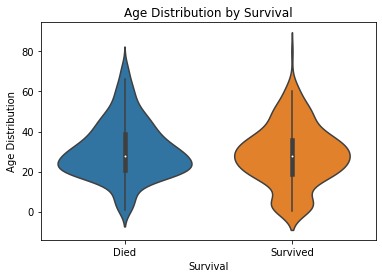

In [ ]:
#@title Violin For age

p = sns.violinplot(data =titanic, x = 'Survived', y = 'Age')
p.set(title = 'Age Distribution by Survival', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived']);

<AxesSubplot:>

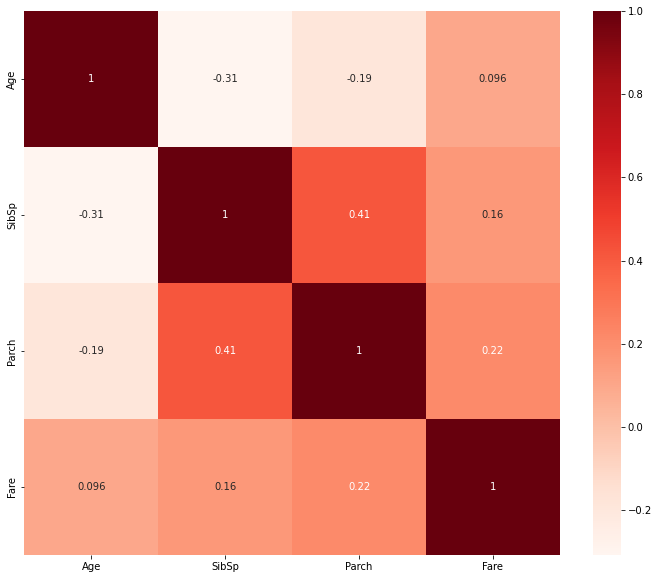

In [ ]:
#@title Correlation Between Numerical Features
plt.figure(figsize=(12,10))
numeric=titanic[['Age','SibSp','Parch','Fare']]
cor = numeric.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)


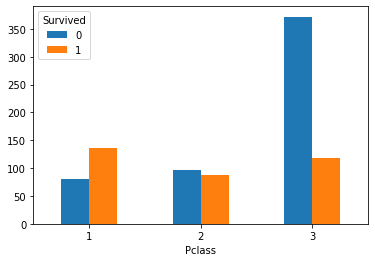

In [ ]:
crosstb=pd.crosstab(titanic['Pclass'],titanic['Survived'])
barplot = crosstb.plot.bar(rot=0)


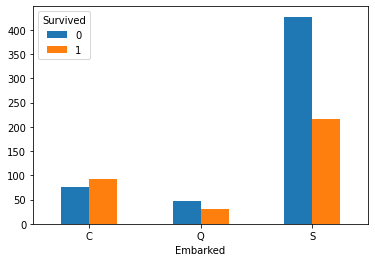

In [ ]:
crosstb=pd.crosstab(titanic['Embarked'],titanic['Survived'])
barplot = crosstb.plot.bar(rot=0)


In [ ]:
#titanic.nunique()
titanic.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic['Age'].fillna(value=titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna(value='A',inplace=True)

titanic.isna().sum()
#titanic.info()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
titanic.dropna(inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


#EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

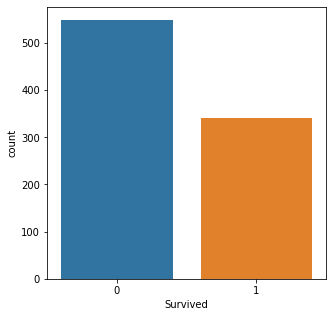

In [ ]:
#Total Number of People Survived or Not
plt.figure(figsize= (5,5))

sns.countplot(x=titanic['Survived'],data=titanic)

<AxesSubplot:title={'center':'Number of Males And Female on Survived or Not'}, xlabel='Sex', ylabel='count'>

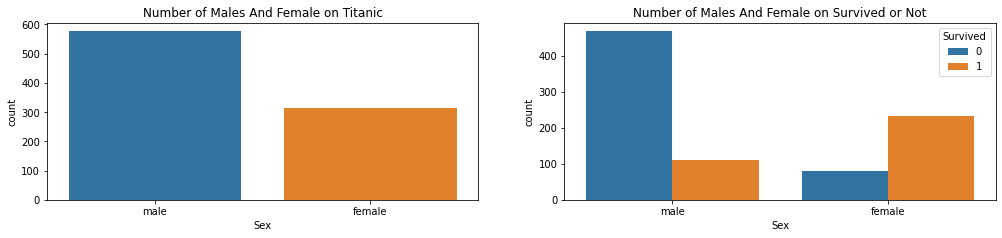

In [ ]:
#There were nearly 550 men and 300 women on titanic
plt.figure(figsize= (17,15))
plt.subplot(4,2,1)
plt.title('Number of Males And Female on Titanic')
sns.countplot(x=titanic['Sex'],data=titanic)

#More Females Survived from the accident 100 men and 200 women survived 
plt.subplot(4,2,2)
plt.title('Number of Males And Female on Survived or Not')

sns.countplot(data=titanic, x='Sex', hue="Survived")

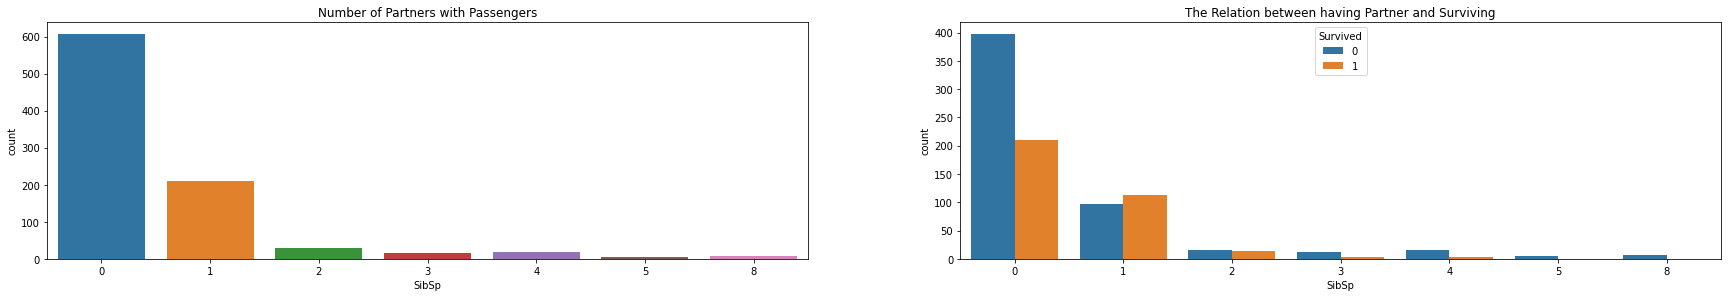

In [ ]:
#Count of people having partners with them or not on Titanic
plt.figure(figsize= (30,20))
plt.subplot(4,2,1)
plt.title('Number of Partners with Passengers')
sns.countplot(x=titanic['SibSp'],data=titanic)

#If Person was alone the probability that he died is higher than survived
plt.subplot(4,2,2)
plt.title('The Relation between having Partner and Surviving')

sns.countplot(data=titanic, x='SibSp', hue="Survived")


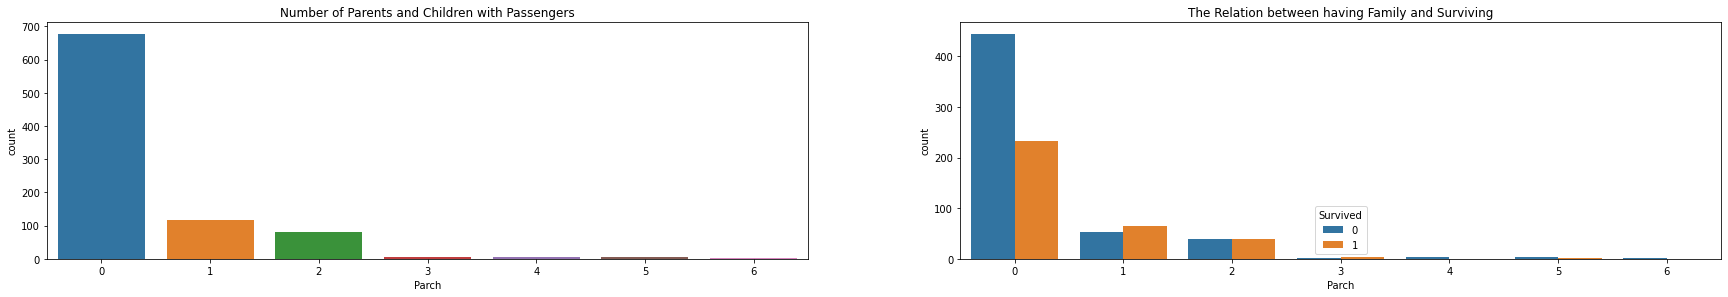

In [ ]:
#@title Count of people having Parents and Children with them or not on Titanic
plt.figure(figsize= (30,20))
plt.subplot(4,2,1)
plt.title('Number of Parents and Children with Passengers')
sns.countplot(x=titanic['Parch'],data=titanic)

#If Person was alone the probability that he died is higher than survived
plt.subplot(4,2,2)
plt.title('The Relation between having Family and Surviving')

sns.countplot(data=titanic, x='Parch', hue="Survived")


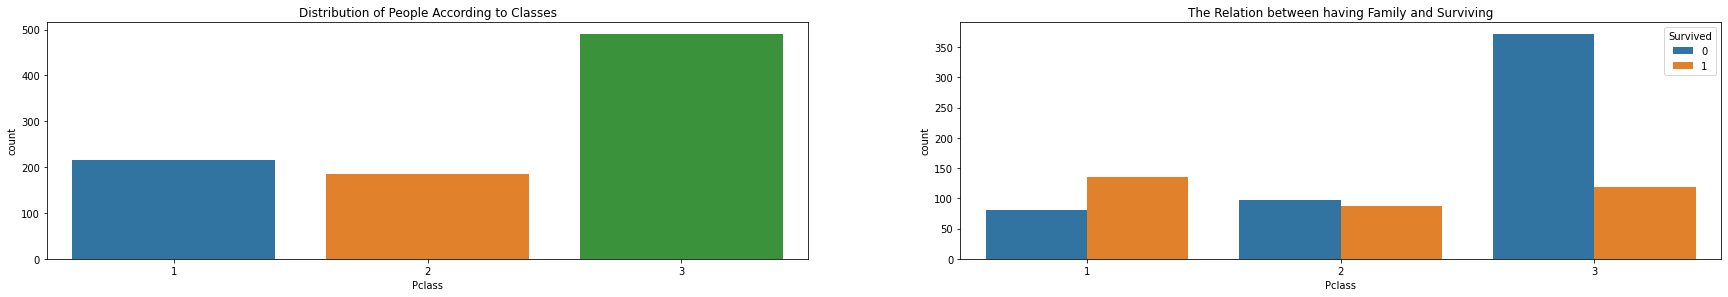

In [ ]:
#@title Count of people of Different Classes on Titanic
plt.figure(figsize= (30,20))
plt.subplot(4,2,1)
plt.title('Distribution of People According to Classes')
sns.countplot(x=titanic['Pclass'],data=titanic)

#If Person was 3rd class  the probability that he died is higher than survived
plt.subplot(4,2,2)
plt.title('The Relation between having Family and Surviving')

sns.countplot(data=titanic, x='Pclass', hue="Survived")

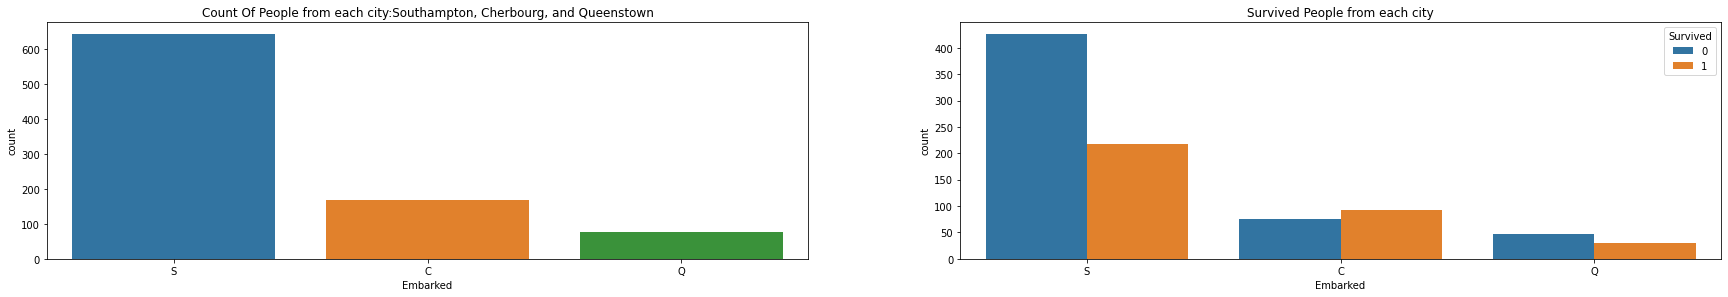

In [ ]:
#@title Southampton, Cherbourg, and Queenstown
plt.figure(figsize= (30,20))
plt.subplot(4,2,1)
plt.title('Count Of People from each city:Southampton, Cherbourg, and Queenstown')
sns.countplot(x=titanic['Embarked'],data=titanic)


plt.subplot(4,2,2)
plt.title('Survived People from each city')
sns.countplot(data=titanic, x='Embarked', hue="Survived")


<AxesSubplot:title={'center':'Numver Of Survival When The Fare was the Highest'}, xlabel='Fare', ylabel='count'>

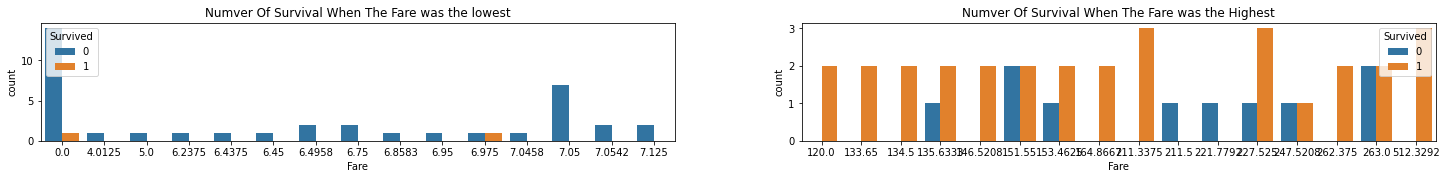

In [ ]:
plt.figure(figsize= (25,10))
plt.subplot(4,2,1)
x=titanic.sort_values(by=['Fare']).head(40)
sns.countplot(data=x, x='Fare', hue="Survived")
plt.title('Numver Of Survival When The Fare was the lowest')
plt.subplot(4,2,2)
plt.title('Numver Of Survival When The Fare was the Highest')

y=titanic.sort_values(by=['Fare']).tail(40)
sns.countplot(data=y, x='Fare', hue="Survived")



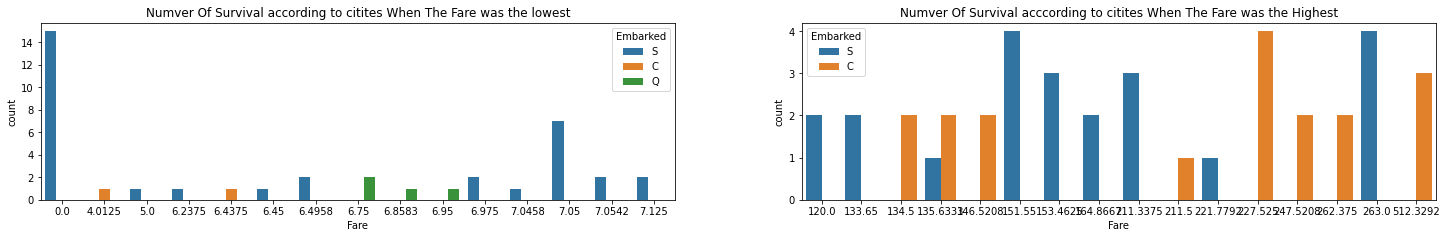

In [ ]:
plt.figure(figsize= (25,15))
plt.subplot(4,2,1)
x=titanic.sort_values(by=['Fare']).head(40)
sns.countplot(data=x, x='Fare', hue="Embarked")
plt.title('Numver Of Survival according to citites When The Fare was the lowest')
plt.subplot(4,2,2)
plt.title('Numver Of Survival acccording to citites When The Fare was the Highest')

y=titanic.sort_values(by=['Fare']).tail(40)
sns.countplot(data=y, x='Fare', hue="Embarked")

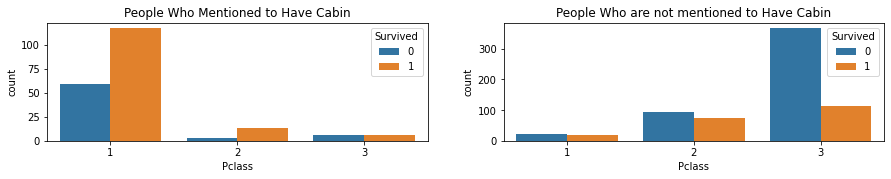

In [ ]:
#People Who are mentioned to have Cabin Has better chance to survive
plt.figure(figsize= (15,10))

plt.subplot(4,2,1)
plt.title('People Who Mentioned to Have Cabin')
x=titanic[titanic['Cabin']!='A' ]
sns.countplot(data=x, x='Pclass', hue="Survived")


plt.subplot(4,2,2)
plt.title('People Who are not mentioned to Have Cabin')
y=titanic[titanic['Cabin']=='A']
sns.countplot(data=y, x='Pclass', hue="Survived")



#Machine Learning Models


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label

titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])


titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 90.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split

y = titanic.Survived
x = titanic.drop(['Name','PassengerId','Cabin','Ticket','Survived'],axis = 1)
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42,shuffle=True)

In [ ]:
#Models Train and Test
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score


Log_Reg_model = LogisticRegression()
Nb_model = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=11)
svm_model = svm.SVC(probability=True)
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
XGB_model = XGBClassifier()
models=[Log_Reg_model,Nb_model,knn,svm_model,DT_model,RF_model,XGB_model]


In [ ]:
for model in models:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print(model)
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')






LogisticRegression()
Model Accuracy = 78.1 %
Model recall = 78.3 %
Model precision = 69.2 %
Model f1_score = 73.5 %
ROC_AUC : 0.8527


GaussianNB()
Model Accuracy = 77.5 %
Model recall = 76.8 %
Model precision = 68.8 %
Model f1_score = 72.6 %
ROC_AUC : 0.8098


KNeighborsClassifier(n_neighbors=11)
Model Accuracy = 75.8 %
Model recall = 60.9 %
Model precision = 72.4 %
Model f1_score = 66.1 %
ROC_AUC : 0.7754


SVC(probability=True)
Model Accuracy = 68.5 %
Model recall = 31.9 %
Model precision = 71.0 %
Model f1_score = 44.0 %
ROC_AUC : 0.7327


DecisionTreeClassifier()
Model Accuracy = 74.2 %
Model recall = 76.8 %
Model precision = 63.9 %
Model f1_score = 69.7 %
ROC_AUC : 0.7384


RandomForestClassifier()
Model Accuracy = 77.5 %
Model recall = 73.9 %
Model precision = 69.9 %
Model f1_score = 71.8 %
ROC_AUC : 0.8436


XGBClassifier()
Model Accuracy = 79.8 %
Model recall = 72.5 %
Model precision = 74.6 %
Model f1_score = 73.5 %
ROC_AUC : 0.8656




Text(0, 0.5, 'Error Rate')

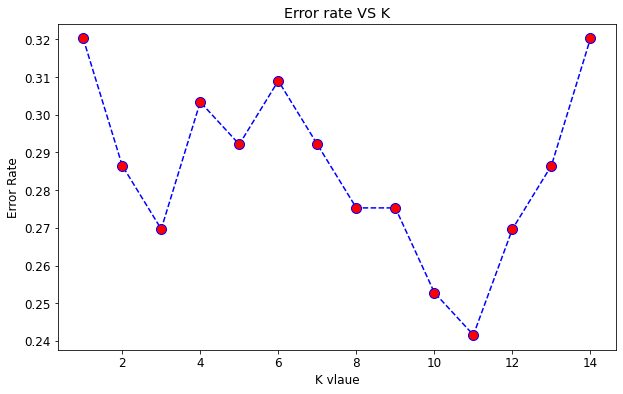

In [ ]:
#@title KNN Hyptertuning
error_rate = []

for i in range(1,15):

  Knn_tuning = KNeighborsClassifier(n_neighbors=i)

  Knn_tuning.fit(x_train,y_train)

  predict_i= Knn_tuning.predict(x_test)

  error_rate.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,15), error_rate, color='blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error rate VS K")

# plt.ylim(0.060,0.064)
# plt.xlim(10,35)
plt.xlabel('K vlaue')
plt.ylabel('Error Rate')

In [ ]:
#@title SVC hypertunning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf', 'linear']}
svm_model = svm.SVC(probability=True)

clf = GridSearchCV(estimator=svm_model, param_grid=param_grid)
clf = clf.fit(x_train, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

In [ ]:
#@title Decision Tree
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

DT_model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=DT_model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(x_train, y_train)
grid_search.best_params_



Fitting 4 folds for each of 50 candidates, totalling 200 fits


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}

In [ ]:
DT_model = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5)
DT_model.fit(x_train,y_train)


y_pred = DT_model.predict(x_test)
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
y_pred_proba = DT_model.predict_proba(x_test)[::,1]
ROC_AUC = roc_auc_score(y_test,y_pred_proba)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )
print("ROC_AUC : {:.4f}".format(ROC_AUC))


'''
#Hypertuned Decision tree
Model Accuracy = 82.0 %
Model recall = 78.3 %
Model precision = 76.1 %
Model f1_score = 77.1 %
ROC_AUC : 0.8671

'''

Model Accuracy = 82.0 %
Model recall = 78.3 %
Model precision = 76.1 %
Model f1_score = 77.1 %
ROC_AUC : 0.8671


In [ ]:
#@title Naive Bayes Hypertunning
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3
                                    )
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)

gs_NB.fit(Data_transformed, y_test);
gs_NB.best_params_


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 1.0}

#Random forrest hypertuning


In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
rfc=RandomForestClassifier(random_state=42,criterion='gini',max_depth=7,max_features='auto',n_estimators=500)
rfc.fit(x_train,y_train)


y_pred = rfc.predict(x_test)
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
y_pred_proba = rfc.predict_proba(x_test)[::,1]
ROC_AUC = roc_auc_score(y_test,y_pred_proba)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )
print("ROC_AUC : {:.4f}".format(ROC_AUC))



Model Accuracy = 79.8 %
Model recall = 69.6 %
Model precision = 76.2 %
Model f1_score = 72.7 %
ROC_AUC : 0.8488


#Logistic Regression hypertunning

In [ ]:



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring1 = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}


Log_Reg_model = LogisticRegression(max_iter=12000)

grid={"C":np.logspace(-3,3,7),'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
      
grid_search = GridSearchCV(estimator = Log_Reg_model,  
                           param_grid = grid,
                           scoring = scoring1,
                           cv = 5,
                           refit='accuracy'
                           )

grid_search.fit(x_train, y_train)   
print(grid_search.best_params_)


{'C': 0.1, 'solver': 'newton-cg'}


In [ ]:
Log_Reg_model = LogisticRegression(C=0.1,solver='newton-cg')
Log_Reg_model.fit(x_train,y_train)
y_pred = Log_Reg_model.predict(x_test)
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
y_pred_proba = Log_Reg_model.predict_proba(x_test)[::,1]
ROC_AUC = roc_auc_score(y_test,y_pred_proba)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )
print("ROC_AUC : {:.4f}".format(ROC_AUC))


'''
HyperTuned
#logistic
Model Accuracy = 81.5 %
Model recall = 78.3 %
Model precision = 75.0 %
Model f1_score = 76.6 %
ROC_AUC : 0.8509
'''


Model Accuracy = 81.5 %
Model recall = 78.3 %
Model precision = 75.0 %
Model f1_score = 76.6 %
ROC_AUC : 0.8509


#Hypertune XGB Boost

In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

PARAMETERS = {'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
          }
XGB_model = XGBClassifier()
grid=GridSearchCV(XGB_model,param_grid=PARAMETERS,cv=5,scoring='f1')
grid.fit(x_train,y_train)
print(grid.best_params_)


{'colsample_bytree': 0.8, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.3, 'reg_lambda': 1.2, 'subsample': 0.8}


In [ ]:
#@title xgb hypertune
XGB_model = XGBClassifier(colsample_bytree=0.8, max_depth= 15, n_estimators=400, reg_alpha= 1.3, reg_lambda= 1.2, subsample= 0.8)

XGB_model.fit(x_train,y_train)


y_pred = XGB_model.predict(x_test)
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
y_pred_proba = XGB_model.predict_proba(x_test)[::,1]
ROC_AUC = roc_auc_score(y_test,y_pred_proba)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )
print("ROC_AUC : {:.4f}".format(ROC_AUC))



'''
#xgb

Model Accuracy = 82.0 %
Model recall = 76.8 %
Model precision = 76.8 %
Model f1_score = 76.8 %
ROC_AUC : 0.8704
'''



Model Accuracy = 82.0 %
Model recall = 76.8 %
Model precision = 76.8 %
Model f1_score = 76.8 %
ROC_AUC : 0.8704


#Extra

[[108   9]
 [ 30  31]]


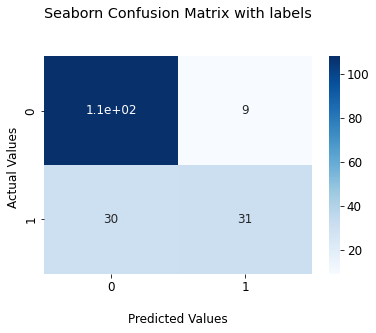

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_test,y_pred)


print(cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

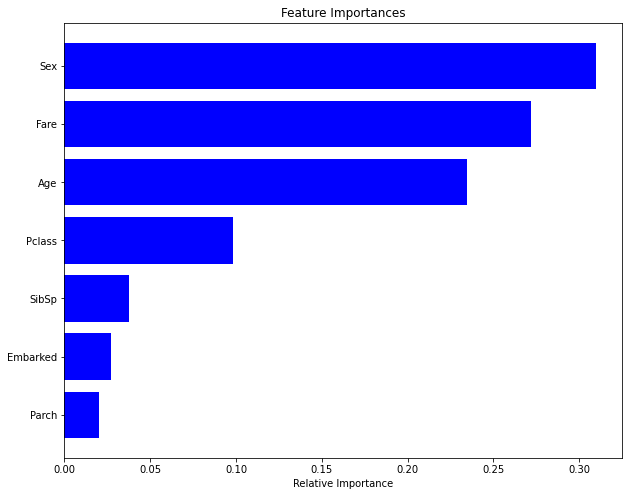

In [ ]:
features = x.columns
importances = DT_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Random Forrest**

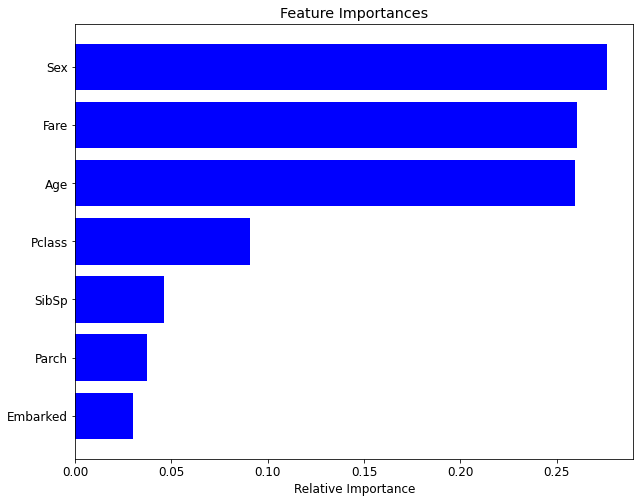

In [ ]:
features = x.columns
importances = RF_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#Ensemble

In [ ]:
#New
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42,shuffle=True)


clf = VotingClassifier(
          estimators=[('lr',LogisticRegression()), ('DT',DecisionTreeClassifier()),('Xgb',XGBClassifier())]
          , voting='soft')
#put the combination of parameters here 
p = [{'lr__C':[1,2],'gboost__n_estimator':[10,20]}]

grid = GridSearchCV(clf,p,cv=5,scoring='neg_log_loss')
grid.fit(X_train,Y_train)





params = {'c0__learning_rate': [0.1, 0.2, 0.3],
          'c0__n_estimators': [50, 100, 150, 200],
          'c0__max_depth': [3, 4, 5],
          'c0__subsample': [1.0, 0.9, 0.7],
          'c1__n_estimators': [50, 100, 150, 200],
          'c1__min_samples_split': [2, 3]}

eclf = VotingClassifier(estimators=[('c0', clf0), ('c1', clf1), ('c2', clf2)], voting='soft', weights=[1, 2, 1])
clf = GridSearchCV(estimator=eclf, param_grid=params, cv=5, verbose=1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xg = XGBClassifier()
dt =DecisionTreeClassifier()
lr = LogisticRegression(max_iter=8000)


xg_param = {
    "n_estimators": [50, 100, 150,400,550],
    "max_depth": [3, 6, 9],
    "colsample_bytree": [0.5, 0.9, 1.0],
    "learning_rate": [0.5, 0.9, 1.0],
     'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3]
    
}

dt_param={
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}


lr_param = {
  "C":np.logspace(-3,3,7),'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}









params = {}
params.update({"xg__" + k: v for k, v in xg_param.items()})
params.update({"dt__" + k: v for k, v in dt_param.items()})
params.update({"lr__" + k: v for k, v in lr_param.items()})

eclf = VotingClassifier(estimators=[("xg", xg),
                                    ("dt", dt),
                                    ("lr", lr)],
                        voting="soft")

clf = RandomizedSearchCV(eclf,
                         param_distributions=params,
                         cv=5,
                         n_iter=100,
                         n_jobs=1,
                         verbose=2)
clf.fit(x_train, y_train)
predict = clf.predict(x_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END dt__criterion=entropy, dt__max_depth=3, dt__min_samples_leaf=100, lr__C=10.0, lr__solver=sag, xg__colsample_bytree=0.7, xg__learning_rate=1.0, xg__max_depth=3, xg__n_estimators=50, xg__reg_alpha=1.2, xg__reg_lambda=1.3; total time=   1.5s
[CV] END dt__criterion=entropy, dt__max_depth=3, dt__min_samples_leaf=100, lr__C=10.0, lr__solver=sag, xg__colsample_bytree=0.7, xg__learning_rate=1.0, xg__max_depth=3, xg__n_estimators=50, xg__reg_alpha=1.2, xg__reg_lambda=1.3; total time=   1.4s
[CV] END dt__criterion=entropy, dt__max_depth=3, dt__min_samples_leaf=100, lr__C=10.0, lr__solver=sag, xg__colsample_bytree=0.7, xg__learning_rate=1.0, xg__max_depth=3, xg__n_estimators=50, xg__reg_alpha=1.2, xg__reg_lambda=1.3; total time=   1.5s
[CV] END dt__criterion=entropy, dt__max_depth=3, dt__min_samples_leaf=100, lr__C=10.0, lr__solver=sag, xg__colsample_bytree=0.7, xg__learning_rate=1.0, xg__max_depth=3, xg__n_estimators=50, xg_

In [ ]:
clf.best_params_

{'xg__reg_lambda': 1.1,
 'xg__reg_alpha': 1.2,
 'xg__n_estimators': 50,
 'xg__max_depth': 9,
 'xg__learning_rate': 0.9,
 'xg__colsample_bytree': 0.8,
 'lr__solver': 'liblinear',
 'lr__C': 100.0,
 'dt__min_samples_leaf': 5,
 'dt__max_depth': 3,
 'dt__criterion': 'gini'}

**Ensemble Method**

In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42,shuffle=True)

model_1 = LogisticRegression(C=100.0,solver='liblinear',max_iter=8000)
model_2=DT_model = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5)
model_3=XGBClassifier(colsample_bytree=0.8, max_depth= 9, n_estimators=50, reg_alpha= 1.2, reg_lambda= 1.1, learning_rate=0.9)
'''

model_1 = LogisticRegression(C=464.15888336127773,max_iter=8000)
model_2=DT_model = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=5)
model_3=XGBClassifier(colsample_bytree=1.0, max_depth= 9,learning_rate=0.5,n_estimators=50)
'''

final_model = VotingClassifier(
    estimators=[("LR", model_1),("Xgb",model_3),('dt',model_2)],voting='soft')

final_model.fit(x_train,y_train)

y_pred = final_model.predict(x_test)

In [ ]:
from sklearn import metrics

accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
y_pred_proba = final_model.predict_proba(x_test)[::,1]
ROC_AUC = roc_auc_score(y_test,y_pred_proba)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )
print("ROC_AUC : {:.4f}".format(ROC_AUC))

Model Accuracy = 83.7 %
Model recall = 79.7 %
Model precision = 78.6 %
Model f1_score = 79.1 %
ROC_AUC : 0.8743


In [ ]:
'''

#ENSEMLBE 1 1 1 logistic xgb dt
Model Accuracy = 84.3 %
Model recall = 76.8 %
Model precision = 81.5 %
Model f1_score = 79.1 %
ROC_AUC : 0.8739


HyperTuned
#logistic
Model Accuracy = 81.5 %
Model recall = 78.3 %
Model precision = 75.0 %
Model f1_score = 76.6 %
ROC_AUC : 0.8509

#xgb hypertunned

Model Accuracy = 82.0 %
Model recall = 76.8 %
Model precision = 76.8 %
Model f1_score = 76.8 %
ROC_AUC : 0.8704



#ensemlbe 3,2 logistic and xgb
Model Accuracy = 83.1 %
Model recall = 78.3 %
Model precision = 78.3 %
Model f1_score = 78.3 %
ROC_AUC : 0.8718

'''


'''


#ENSEMBLE 1 1 4
Model Accuracy = 82.6 %
Model recall = 81.2 %
Model precision = 75.7 %
Model f1_score = 78.3 %
ROC_AUC : 0.8752
'''